In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("C:/Users/jiyad/OneDrive/Desktop/Salary Prediction/Salary_Data .csv",encoding='latin1')
df

,ï»¿Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df_copy = df.copy()
df.isnull().sum()

ï»¿Age                 2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
for column in df.columns:
    df.fillna(df[column].mode()[0],inplace=True)

In [5]:
df.isnull().sum()

ï»¿Age                 0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [6]:
df.duplicated().sum()

4912

In [7]:
df = df.drop_duplicates()

In [8]:
df

,ï»¿Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [9]:
df.describe().T
df.describe(include="object").T

,count,unique,top,freq
Gender,1792,4,Male,969
Education Level,1792,8,Bachelor's Degree,508
Job Title,1792,194,Software Engineer Manager,127


array([[<Axes: title={'center': 'ï»¿Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

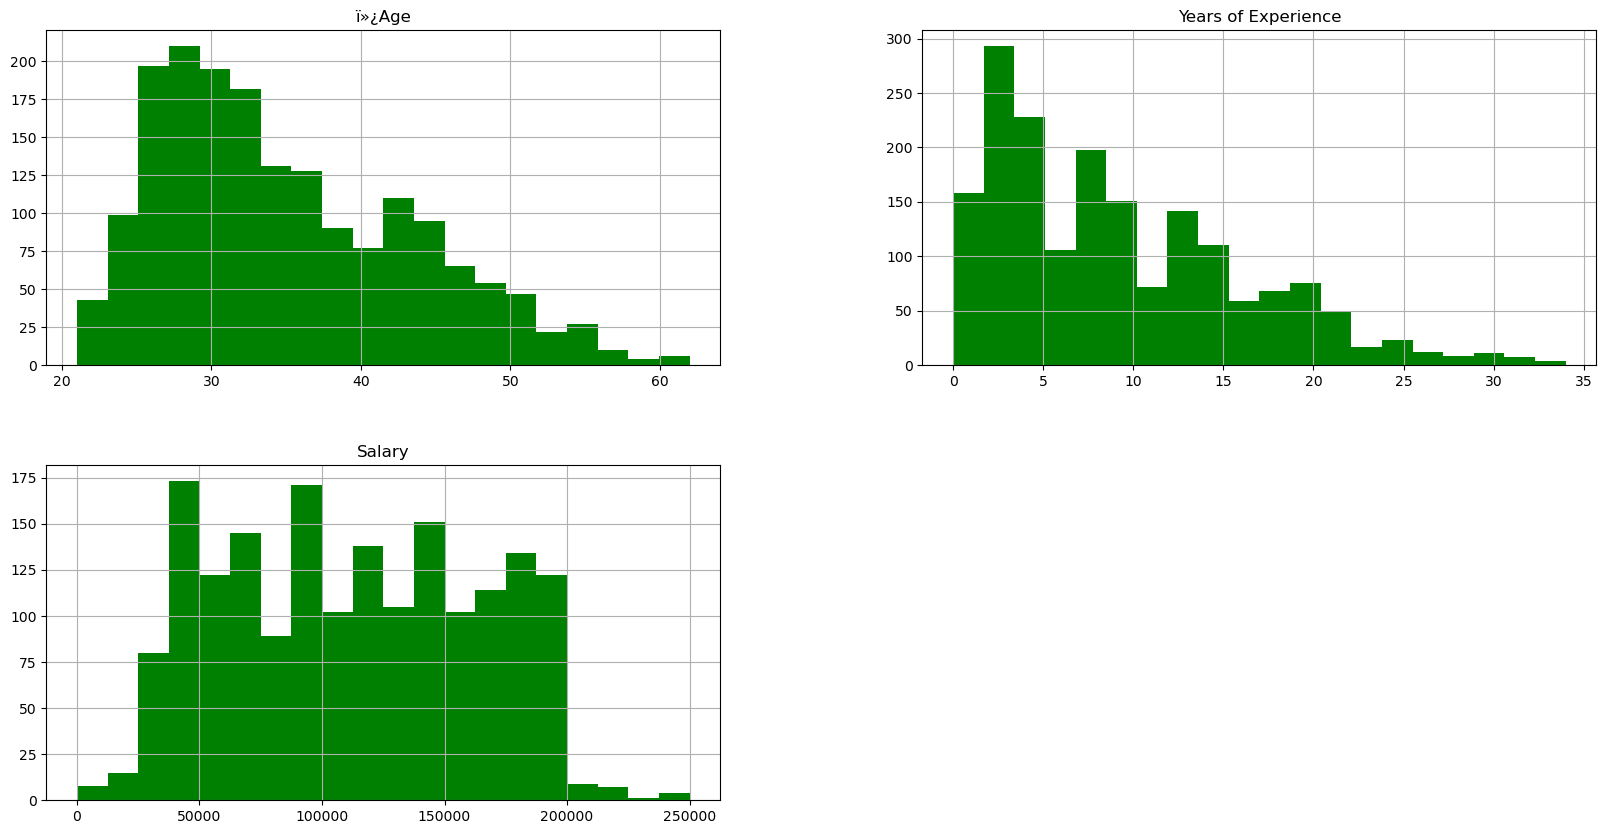

In [10]:
import matplotlib.pyplot as plt
df.hist(bins=20,color="green",figsize=(20,10))

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ï»¿Age,1792.0,35.123884,8.209516,21.0,29.0,33.0,41.0,62.0
Years of Experience,1792.0,9.172433,6.861952,0.0,3.0,8.0,13.0,34.0
Salary,1792.0,112924.718192,51801.521900,27.0,68957.0,110000.0,160000.0,250000.0


In [16]:
df.rename(columns={"ï»¿Age":"Age"},inplace=True)

C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\1693674404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"ï»¿Age":"Age"},inplace=True)


In [17]:
df["Age"] = pd.to_numeric(df['Age'],errors="coerce")
df["Age_cat"] = pd.cut(df["Age"],bins=[19,30,40,50,60,np.inf],labels=['Twenties','Thirties','Forties','Fifties','Above_Sixty'])

C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\2783423024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = pd.to_numeric(df['Age'],errors="coerce")
C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\2783423024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_cat"] = pd.cut(df["Age"],bins=[19,30,40,50,60,np.inf],labels=['Twenties','Thirties','Forties','Fifties','Above_Sixty'])


In [22]:
df["Years_Exper"] = pd.cut(df["Years of Experience"],bins=[-1,5,10,15,20,np.inf],labels=['0-5','6-10','11-15','16-20','21-25'])
df

C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\2327527204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Years_Exper"] = pd.cut(df["Years of Experience"],bins=[-1,5,10,15,20,np.inf],labels=['0-5','6-10','11-15','16-20','21-25'])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_cat,Sal_Cat,Years_Exper
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Thirties,Medium,0-5
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Twenties,Medium,0-5
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Forties,High,11-15
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Thirties,Medium,6-10
4,52.0,Male,Master's,Director,20.0,200000.0,Fifties,Very High,16-20
...,...,...,...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0,Forties,High,11-15
6624,27.0,Male,High School,Sales Manager,2.0,40000.0,Twenties,Low,0-5
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0,Thirties,Medium,6-10
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,Thirties,Medium,6-10


In [23]:
df["Sal_Cat"] = pd.cut(df["Salary"],bins=[0,50000,100000,150000,200000,np.inf],labels=['Low','Medium','High','Very High','Top Tier'])
df

C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\292908551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sal_Cat"] = pd.cut(df["Salary"],bins=[0,50000,100000,150000,200000,np.inf],labels=['Low','Medium','High','Very High','Top Tier'])


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_cat,Sal_Cat,Years_Exper
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Thirties,Medium,0-5
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Twenties,Medium,0-5
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Forties,High,11-15
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Thirties,Medium,6-10
4,52.0,Male,Master's,Director,20.0,200000.0,Fifties,Very High,16-20
...,...,...,...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0,Forties,High,11-15
6624,27.0,Male,High School,Sales Manager,2.0,40000.0,Twenties,Low,0-5
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0,Thirties,Medium,6-10
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,Thirties,Medium,6-10


In [24]:
categories = df[["Gender","Age_cat","Education Level","Job Title","Years_Exper","Sal_Cat"]]

In [25]:
df["Age_cat"].value_counts()

Age_cat
Thirties       664
Twenties       641
Forties        404
Fifties         80
Above_Sixty      3
Name: count, dtype: int64

In [26]:
df["Education Level"].value_counts()

Education Level
Bachelor's Degree    508
Master's Degree      447
PhD                  340
Bachelor's           262
Master's             122
High School          110
27.0                   2
phD                    1
Name: count, dtype: int64

In [27]:
df["Education Level"] = df["Education Level"].replace('phD','PhD')
df["Education Level"] = df["Education Level"].replace("Bachelor's","Bachelor's Degree")
df["Education Level"] = df["Education Level"].replace("Master's","Master's Degree")

C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\2277661494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education Level"] = df["Education Level"].replace('phD','PhD')
C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\2277661494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education Level"] = df["Education Level"].replace("Bachelor's","Bachelor's Degree")
C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\2277661494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [28]:
df["Education Level"].value_counts()

Education Level
Bachelor's Degree    770
Master's Degree      569
PhD                  341
High School          110
27.0                   2
Name: count, dtype: int64

In [29]:
df.drop(df[df["Education Level"] == 27.0].index,inplace=True)
df["Education Level"].value_counts(normalize=True)

C:\Users\jiyad\AppData\Local\Temp\ipykernel_26396\1425237586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["Education Level"] == 27.0].index,inplace=True)


Education Level
Bachelor's Degree    0.430168
Master's Degree      0.317877
PhD                  0.190503
High School          0.061453
Name: proportion, dtype: float64

In [30]:
df["Gender"].value_counts()


Gender
Male      968
Female    815
Other       7
Name: count, dtype: int64

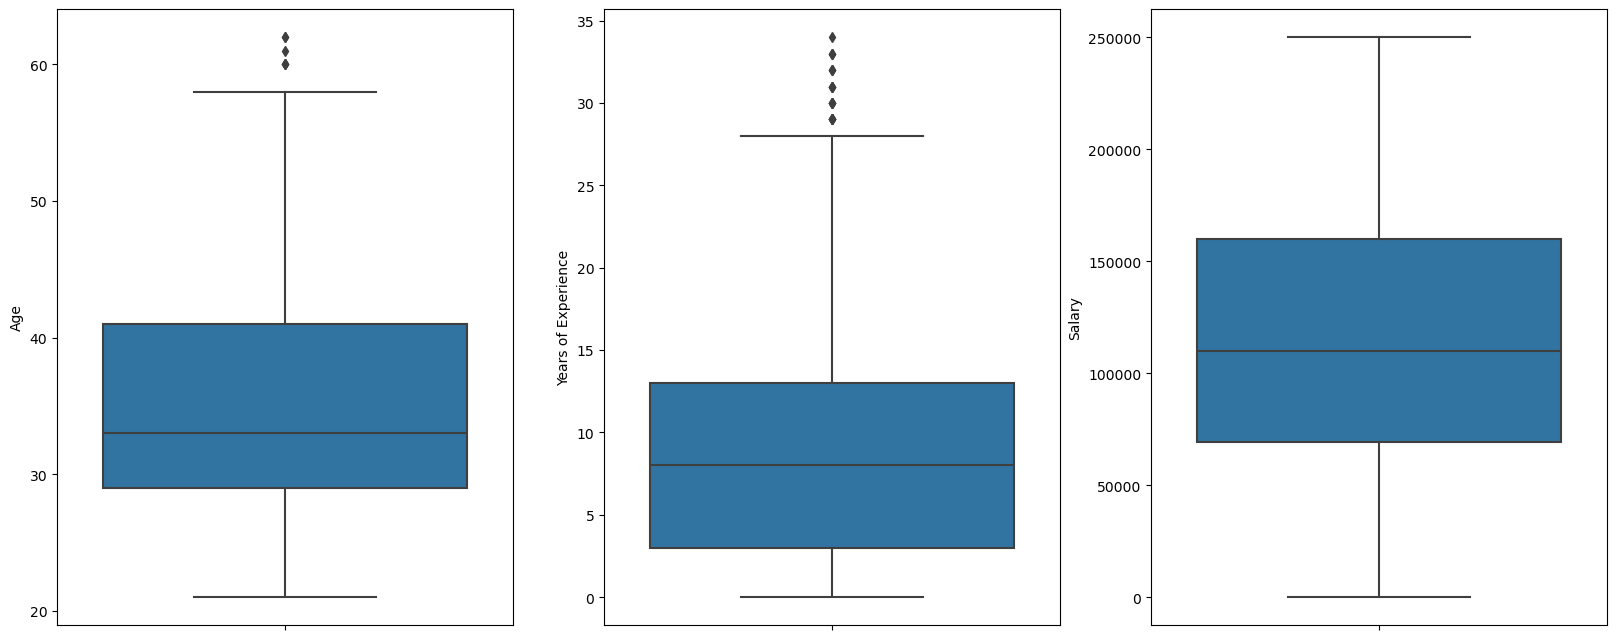

In [31]:
import seaborn as sns
num = df.select_dtypes('number')
plt.figure(figsize=(20,8))
for ind,col in enumerate(num):
    plt.subplot(1,3,1+ind)
    # plt.title("Scatter plot of "+col,fontsize=20)
    # plt.scatter(df.index,df[col],alpha=0.6,color="blue")
    sns.boxplot(data=df,y=col)

In [32]:
num = ['Age','Years of Experience','Salary']
for col in num:
    series = pd.to_numeric(df[col],errors='coerce')

    q1,q3 = series.quantile([0.25,0.75])
    iqr=q3-q1
    low,upp = q1-1.5*iqr,q3+1.5*iqr
    number_outliers=series[(series<low) | (series>upp)].shape[0]
    print(f'Number of outliers for {col}:{number_outliers}')

Number of outliers for Age:6
Number of outliers for Years of Experience:22
Number of outliers for Salary:0


In [33]:
for col in num:
    Q1,Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower , upper = Q1 - 1.5*IQR , Q3+1.5*IQR
    df= df[(df[col] >= lower) & (df[col]<= upper)]
    no_of_outliers = df[(df[col]<lower) | (df[col] > upper)].shape[0]
    print(f'now number of outliers for:{col} : {no_of_outliers}')

now number of outliers for:Age : 0
now number of outliers for:Years of Experience : 0
now number of outliers for:Salary : 0


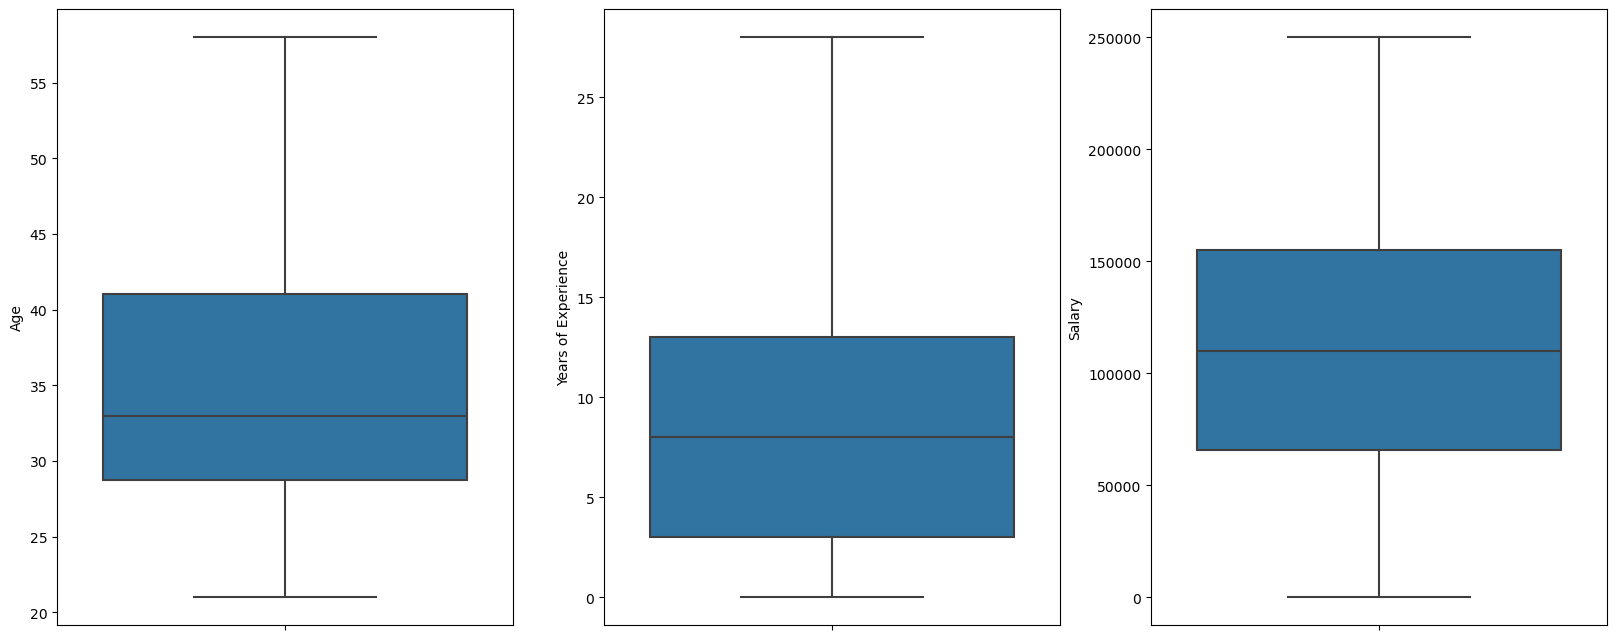

In [34]:
plt.figure(figsize=(20,8))
for ind,col in enumerate(num):
    plt.subplot(1,3,1+ind)
    sns.boxplot(data=df,y=df[col])

In [35]:
Female = df[df["Gender"]=="Female"]
Male=df[df["Gender"] == "Male"]

<Axes: >

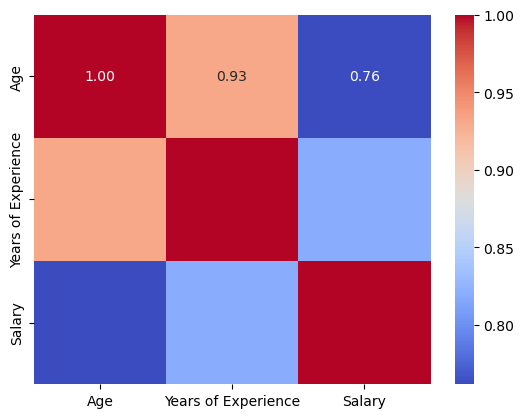

In [37]:
corre=df.corr(numeric_only=True)
sns.heatmap(corre,annot=True,cmap="coolwarm",fmt=".2f")

c:\Users\jiyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jiyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jiyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x800 with 0 Axes>

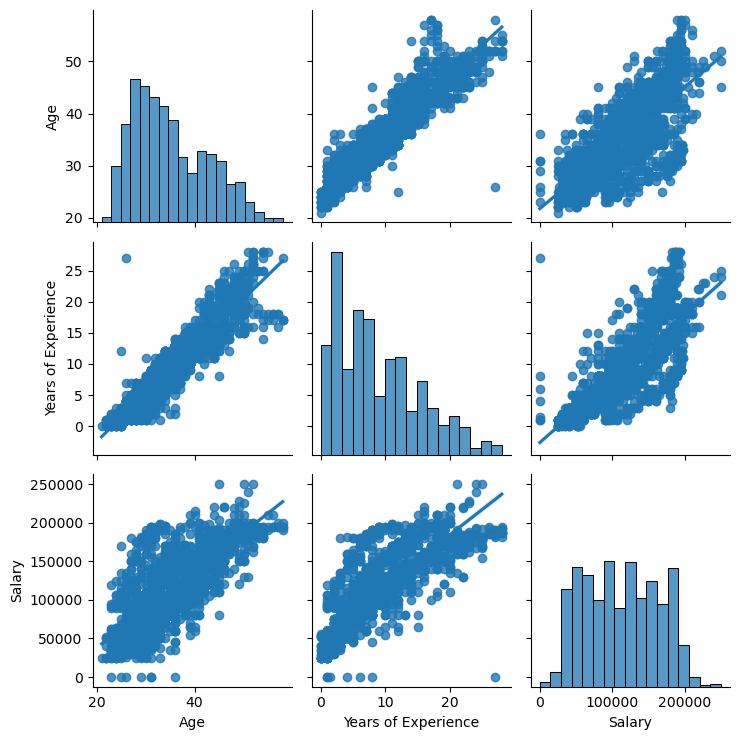

In [38]:
plt.figure(figsize=(20,8))
sns.pairplot(df[["Age","Years of Experience","Salary"]],kind="reg")
plt.tight_layout()

In [39]:
df.to_csv("cleaned_salary.csv")

# Modelling with the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

In [41]:
try:
    emp_df = pd.read_csv('cleaned_salary.csv', encoding='latin1')
except FileNotFoundError:
    # Fallback if filename has no space
    df = pd.read_csv('cleaned_salary.csv', encoding='latin1')

In [42]:
X = df[['Age','Gender','Education Level','Job Title','Years of Experience']]
y= df['Salary']

In [43]:
numeric_features = ['Age', 'Years of Experience']
numeric_transformer = StandardScaler()

# Categorical features (Text columns)
categorical_features = ['Gender', 'Education Level', 'Job Title']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# for col in numeric_features:
#     X[col] = pd.to_numeric(X[col], errors="coerce")

# for col in categorical_features:
#     X[col] = X[col].astype(str)
# Combine them
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Initialize Model (Random Forest)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 5. Train the Model
print("⏳ Training model on your clean data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# 6. Check Accuracy
score = model.score(X_test, y_test)
print(f"✅ Model Training Complete!")
print(f"📊 R2 Score (Accuracy): {score:.4f}")
# accuracy = round(score,4)
# metrics = {
#     "accuracy":accuracy
# }

⏳ Training model on your clean data...
✅ Model Training Complete!
📊 R2 Score (Accuracy): 0.8958


In [44]:
joblib.dump(model,'salary_pipeline.pkl')

['salary_pipeline.pkl']